# <span style="color:LightSeaGreen">Pandas Notes -  Getting started</span>

## <span style="color:LightSeaGreen">Package overview</span>

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis/manipulation tool available in any language. It is already well on its way toward this goal.  

pandas is well suited for many different kinds of data:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet.  
- Ordered and unordered (not necessarily fixed-frequency) time series data.  
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels.  
- Any other form of observational / statistical data sets. The data need not be labeled at all to be placed into a pandas data structure.  

**The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering.** For R users, DataFrame provides everything that R’s data.frame provides and much more. pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

Here are just a few of the things that pandas does well:

- Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data.  
- Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects.  
- Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations.  
- Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data.  
- Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects.  
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets.  
- Intuitive merging and joining data sets.  
- Flexible reshaping and pivoting of data sets.  
- Hierarchical labeling of axes (possible to have multiple labels per tick).  
- Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format.  
- Time series-specific functionality: date range generation and frequency conversion, moving window statistics, date shifting, and lagging.  

Many of these principles are here to address the shortcomings frequently experienced using other languages / scientific research environments. For data scientists, working with data is typically divided into multiple stages: munging and cleaning data, analyzing / modeling it, then organizing the results of the analysis into a form suitable for plotting or tabular display. pandas is the ideal tool for all of these tasks.

Some other notes

**pandas is fast.** Many of the low-level algorithmic bits have been extensively tweaked in Cython code. However, as with anything else generalization usually sacrifices performance. So if you focus on one feature for your application you may be able to create a faster specialized tool.
pandas is a dependency of statsmodels, making it an important part of the statistical computing ecosystem in Python.
pandas has been used extensively in production in financial applications.

### <span style="color:LightSeaGreen">Data structures</span>

| Dimensions | Name       | Description                                               |
|------------|------------|-----------------------------------------------------------|
| 1          | Series     | 1D labeled homogeneously-typed array                     |
| 2          | DataFrame  | General 2D labeled, size-mutable tabular structure with  |
|            |            | potentially heterogeneously-typed columns                |

<span style="color:LightSeaGreen; font-weight: bold;">Why more than one data structure?</span>

The best way to think about the pandas data structures is as flexible containers for lower dimensional data. For example, DataFrame is a container for Series, and Series is a container for scalars. We would like to be able to insert and remove objects from these containers in a dictionary-like fashion.  

Also, we would like sensible default behaviors for the common API functions which take into account the typical orientation of time series and cross-sectional data sets. When using the N-dimensional array (ndarrays) to store 2- and 3-dimensional data, a burden is placed on the user to consider the orientation of the data set when writing functions; axes are considered more or less equivalent (except when C- or Fortran-contiguousness matters for performance). In pandas, the axes are intended to lend more semantic meaning to the data; i.e., for a particular data set, there is likely to be a “right” way to orient the data. The goal, then, is to reduce the amount of mental effort required to code up data transformations in downstream functions.  

For example, with tabular data (DataFrame) it is more semantically helpful to think of the index (the rows) and the columns rather than axis 0 and axis 1. Iterating through the columns of the DataFrame thus results in more readable code:  

```python
for col in df.columns:
    series = df[col]
    # do something with series
```

### <span style="color:LightSeaGreen">Mutability and copying of data</span>

**All pandas data structures are value-mutable (the values they contain can be altered) but not always size-mutable.** The length of a Series cannot be changed, but, for example, columns can be inserted into a DataFrame. However, the vast majority of methods produce new objects and leave the input data untouched. In general we like to **favor immutability** where sensible.

## <span style="color:LightSeaGreen">Getting started tutorials</span>

### <span style="color:LightSeaGreen">What kind of data does pandas handle?</span>

In [2]:
import pandas as pd

To load the pandas package and start working with it, import the package. The community agreed alias for pandas is pd, so loading pandas as pd is assumed standard practice for all of the pandas documentation.

<span style="color:LightSeaGreen; font-weight: bold;">pandas data table representation</span>

![table dataframe](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

I want to store passenger data of the Titanic. For a number of passengers, I know the name (characters), age (integers) and sex (male/female) data.

In [3]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

df

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


To manually store data in a table, create a DataFrame. When using a Python dictionary of lists, the dictionary keys will be used as column headers and the values in each list as columns of the DataFrame.

A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data and more) in columns. It is similar to a spreadsheet, a SQL table or the data.frame in R.  

The table has 3 columns, each of them with a column label. The column labels are respectively Name, Age and Sex.
The column Name consists of textual data with each value a string, the column Age are numbers and the column Sex is textual data.
In spreadsheet software, the table representation of our data would look very similar:
![table spreadsheet](https://pandas.pydata.org/docs/_images/01_table_spreadsheet.png)

<span style="color:LightSeaGreen; font-weight: bold;">Each column in a DataFrame is a Series</span>

![table series](https://pandas.pydata.org/docs/_images/01_table_series.svg)

<span style="color:LightSeaGreen; font-weight: bold;">I’m just interested in working with the data in the column Age</span>

In [5]:
df["Age"]

0    22
1    35
2    58
Name: Age, dtype: int64

When selecting a single column of a pandas DataFrame, the result is a pandas Series. To select the column, use the column label in between square brackets [].

<span style="color:LightSeaGreen; font-weight: bold;">You can create a Series from scratch as well:</span>

In [6]:
ages = pd.Series([22, 35, 58], name="Age")

ages

0    22
1    35
2    58
Name: Age, dtype: int64

A pandas Series has no column labels, as it is just a single column of a DataFrame. A Series does have row labels.

<span style="color:LightSeaGreen; font-weight: bold;">Do something with a DataFrame or Series</span>

<span style="color:LightSeaGreen; font-weight: bold;">I want to know the maximum Age of the passengers</span>

We can do this on the DataFrame by selecting the Age column and applying max():

In [7]:
df["Age"].max()

58

As illustrated by the max() method, you can do things with a DataFrame or Series. pandas provides a lot of functionalities, each of them a method you can apply to a DataFrame or Series. **As methods are functions, do not forget to use parentheses ().**

<span style="color:LightSeaGreen; font-weight: bold;">I’m interested in some basic statistics of the numerical data of my data table</span>

In [8]:
df.describe()

,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


The describe() method provides a quick overview of the numerical data in a DataFrame. As the Name and Sex columns are textual data, these are by default not taken into account by the describe() method.  
Many pandas operations return a DataFrame or a Series. The describe() method is an example of a pandas operation returning a pandas Series or a pandas DataFrame.

### <span style="color:LightSeaGreen">How do I read and write tabular data?</span>

<span style="color:LightSeaGreen; font-weight: bold;">How do I read and write tabular data?</span>

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg" alt="read and write" width="700">

In [10]:
titanic = pd.read_csv("Pandas/titanic.csv")

pandas provides the read_csv() function to read data stored as a csv file into a pandas DataFrame. pandas supports many different file formats or data sources out of the box (csv, excel, sql, json, parquet, …), each of them with the prefix read_*.

Make sure to always have a check on the data after reading in the data. When displaying a DataFrame, the first and last 5 rows will be shown by default:

In [11]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
titanic.head(8) #I want to see the first 8 rows of a pandas DataFrame.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


To see the first N rows of a DataFrame, use the head() method with the required number of rows (in this case 8) as argument.  
Interested in the last N rows instead? pandas also provides a tail() method. For example, titanic.tail(10) will return the last 10 rows of the DataFrame.

In [13]:
titanic.dtypes #A check on how pandas interpreted each of the column data types can be done by requesting the pandas dtypes attribute

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

For each of the columns, the used data type is enlisted. The data types in this DataFrame are integers (int64), floats (float64) and strings (object).

<span style="color:LightSeaGreen; font-weight: bold;">When asking for the dtypes, no brackets are used! dtypes is an attribute of a DataFrame and Series. Attributes of DataFrame or Series do not need brackets. Attributes represent a characteristic of a DataFrame/Series, whereas a method (which requires brackets) do something with the DataFrame/Series as introduced in the first tutorial.</span>

In [14]:
titanic.to_excel("titanic.xlsx", sheet_name="passengers", index=False) #data as a spreadsheet

Whereas read_* functions are used to read data to pandas, the to_* methods are used to store data. The to_excel() method stores the data as an excel file. In the example here, the sheet_name is named passengers instead of the default Sheet1. By setting index=False the row index labels are not saved in the spreadsheet.

In [16]:
#The equivalent read function read_excel() will reload the data to a DataFrame:
titanic = pd.read_excel("titanic.xlsx", sheet_name="passengers")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#I’m interested in a technical summary of a DataFrame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The method info() provides technical information about a DataFrame, so let’s explain the output in more detail:

- It is indeed a DataFrame.  
- There are 891 entries, i.e. 891 rows.  
- Each row has a row label (aka the index) with values ranging from 0 to 890.  
- The table has 12 columns. Most columns have a value for each of the rows (all 891 values are non-null). Some columns do have missing values and less than 891 non-null values.  
- The columns Name, Sex, Cabin and Embarked consists of textual data (strings, aka object). The other columns are numerical data with some of them whole numbers (aka integer) and others are real numbers (aka float).  
- The kind of data (characters, integers,…) in the different columns are summarized by listing the dtypes.  
- The approximate amount of RAM used to hold the DataFrame is provided as well.  


<span style="color:LightSeaGreen; font-weight: bold;">REMEMBER  
Getting data in to pandas from many different file formats or data sources is supported by read_* functions.  
Exporting data out of pandas is provided by different to_*methods.  
The head/tail/info methods and the dtypes attribute are convenient for a first check.</span>

### <span style="color:LightSeaGreen">How do I select a subset of a DataFrame?</span>

<img src="https://pandas.pydata.org/docs/_images/03_subset_columns.svg" alt="Subset columns" width="700">

In [19]:
#I’m interested in the age of the Titanic passengers.
ages = titanic['Age'] #To select a single column, use square brackets [] with the column name of the column of interest.
ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [20]:
type(titanic['Age'])

pandas.core.series.Series

In [21]:
titanic['Age'].shape

(891,)

DataFrame.shape is an attribute (remember tutorial on reading and writing, do not use parentheses for attributes) of a pandas Series and DataFrame containing the number of rows and columns: (nrows, ncolumns). A pandas Series is 1-dimensional and only the number of rows is returned.

In [23]:
#To select multiple columns, use a list of column names within the selection brackets [].
age_sex = titanic[["Age", "Sex"]]
age_sex.head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


The inner square brackets define a Python list with column names, whereas the outer brackets are used to select the data from a pandas DataFrame as seen in the previous example.

In [24]:
type(titanic[["Age", "Sex"]])

pandas.core.frame.DataFrame

In [25]:
titanic[["Age", "Sex"]].shape

(891, 2)

The selection returned a DataFrame with 891 rows and 2 columns. Remember, a DataFrame is 2-dimensional with both a row and column dimension.

### <span style="color:LightSeaGreen">How do I filter specific rows from a DataFrame?</span>

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg" alt="Subset rows" width="700">

In [26]:
above_35 = titanic[titanic["Age"] > 35] #To select rows based on a conditional expression, use a condition inside the selection brackets [].
above_35.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


In [27]:
#The condition inside the selection brackets titanic["Age"] > 35 checks 
#for which rows the Age column has a value larger than 35:
titanic["Age"] > 35

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

The output of the conditional expression (>, but also ==, !=, <, <=,… would work) is actually a pandas Series of boolean values (either True or False) with the same number of rows as the original DataFrame. Such a Series of boolean values can be used to filter the DataFrame by putting it in between the selection brackets []. Only rows for which the value is True will be selected.

We know from before that the original Titanic DataFrame consists of 891 rows. Let’s have a look at the number of rows which satisfy the condition by checking the shape attribute of the resulting DataFrame above_35:

In [28]:
above_35.shape

(217, 12)

In [29]:
#I’m interested in the Titanic passengers from cabin class 2 and 3.
class_23 = titanic[titanic["Pclass"].isin([2, 3])]
class_23.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Similar to the conditional expression, the isin() conditional function returns a True for each row the values are in the provided list. To filter the rows based on such a function, use the conditional function inside the selection brackets []. In this case, the condition inside the selection brackets titanic["Pclass"].isin([2, 3]) checks for which rows the Pclass column is either 2 or 3.

The above is equivalent to filtering by rows for which the class is either 2 or 3 and combining the two statements with an | (or) operator:

In [31]:
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
class_23.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


When combining multiple conditional statements, each condition must be surrounded by parentheses (). Moreover, you can not use or/and but need to use the or operator | and the and operator &.

In [33]:
#I want to work with passenger data for which the age is known.
age_no_na = titanic[titanic["Age"].notna()]
age_no_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The notna() conditional function returns a True for each row the values are not a Null value. As such, this can be combined with the selection brackets [] to filter the data table.

In [34]:
age_no_na.shape

(714, 12)

### <span style="color:LightSeaGreen">How do I filter specific rows from a DataFrame?</span>

<img src="https://pandas.pydata.org/docs/_images/03_subset_columns_rows.svg" alt="Subset columns rows" width="700">

In [35]:
#I’m interested in the names of the passengers older than 35 years.
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]
adult_names.head()

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
6                               McCarthy, Mr. Timothy J
11                             Bonnell, Miss. Elizabeth
13                          Andersson, Mr. Anders Johan
15                     Hewlett, Mrs. (Mary D Kingcome) 
Name: Name, dtype: object

In this case, a subset of both rows and columns is made in one go and just using selection brackets [] is not sufficient anymore. The loc/iloc operators are required in front of the selection brackets []. When using loc/iloc, the part before the comma is the rows you want, and the part after the comma is the columns you want to select.

When using the column names, row labels or a condition expression, use the loc operator in front of the selection brackets []. For both the part before and after the comma, you can use a single label, a list of labels, a slice of labels, a conditional expression or a colon. Using a colon specifies you want to select all rows or columns.

In [36]:
#I’m interested in rows 10 till 25 and columns 3 to 5.
titanic.iloc[9:25, 2:5]

,Pclass,Name,Sex
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,3,"Sandstrom, Miss. Marguerite Rut",female
11,1,"Bonnell, Miss. Elizabeth",female
12,3,"Saundercock, Mr. William Henry",male
13,3,"Andersson, Mr. Anders Johan",male
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female
16,3,"Rice, Master. Eugene",male
17,2,"Williams, Mr. Charles Eugene",male
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female


Again, a subset of both rows and columns is made in one go and just using selection brackets [] is not sufficient anymore. When specifically interested in certain rows and/or columns based on their position in the table, use the iloc operator in front of the selection brackets [].

When selecting specific rows and/or columns with loc or iloc, new values can be assigned to the selected data. For example, to assign the name anonymous to the first 3 elements of the third column:

In [37]:
titanic.iloc[0:3, 3] = "anonymous"
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<span style="color:LightSeaGreen; font-weight: bold;">REMEMBER  
- When selecting subsets of data, square brackets [] are used.  
- Inside these brackets, you can use a single column/row label, a list of column/row labels, a slice of labels, a conditional expression or a colon.  
- Select specific rows and/or columns using loc when using the row and column names.  
- Select specific rows and/or columns using iloc when using the positions in the table.  
- You can assign new values to a selection based on loc/iloc.</span>

### <span style="color:LightSeaGreen">How do I create plots in pandas?</span>

<img src="https://pandas.pydata.org/docs/_images/04_plot_overview.svg" alt="Plot overview" width="700">

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

For this tutorial, air quality data about NO2 is used, made available by OpenAQ and using the py-openaq package. The air_quality_no2.csv data set provides NO2 values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.

In [42]:
air_quality = pd.read_csv("Pandas/air_quality_no2.csv", index_col=0, parse_dates=True, sep = ';')
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-07-05 02:00:00,NaN,NaN,23.0
2019-07-05 03:00:00,50.5,25.0,19.0
2019-07-05 04:00:00,45.0,27.7,19.0
2019-07-05 05:00:00,NaN,50.4,16.0
2019-07-05 06:00:00,NaN,61.9,NaN


The usage of the index_col and parse_dates parameters of the read_csv function to define the first (0th) column as index of the resulting DataFrame and convert the dates in the column to Timestamp objects, respectively.

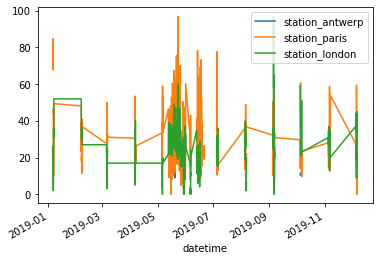

In [43]:
#I want a quick visual check of the data.
air_quality.plot()
plt.show()

With a DataFrame, pandas creates by default one line plot for each of the columns with numeric data.

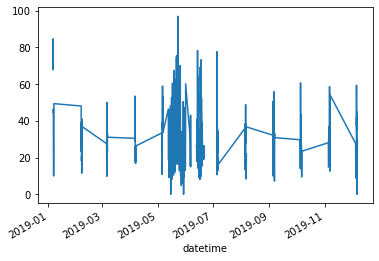

In [44]:
#I want to plot only the columns of the data table with the data from Paris.
air_quality["station_paris"].plot()
plt.show()

To plot a specific column, use the selection method of the subset data tutorial in combination with the plot() method. Hence, the plot() method works on both Series and DataFrame.

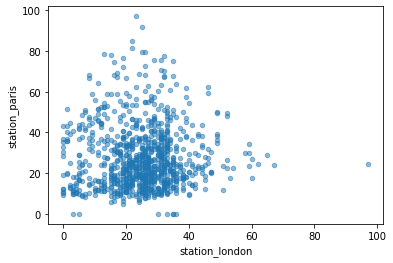

In [45]:
#I want to visually compare the NO2 values measured in London versus Paris.
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)
plt.show()

Apart from the default line plot when using the plot function, a number of alternatives are available to plot data. Let’s use some standard Python to get an overview of the available plot methods:

In [46]:
[
    method_name
    for method_name in dir(air_quality.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

In many development environments as well as IPython and Jupyter Notebook, use the TAB button to get an overview of the available methods, for example air_quality.plot. + TAB.

One of the options is DataFrame.plot.box(), which refers to a boxplot. The box method is applicable on the air quality example data:

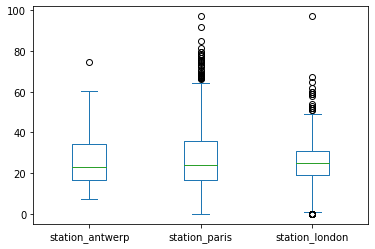

In [47]:
air_quality.plot.box()
plt.show()

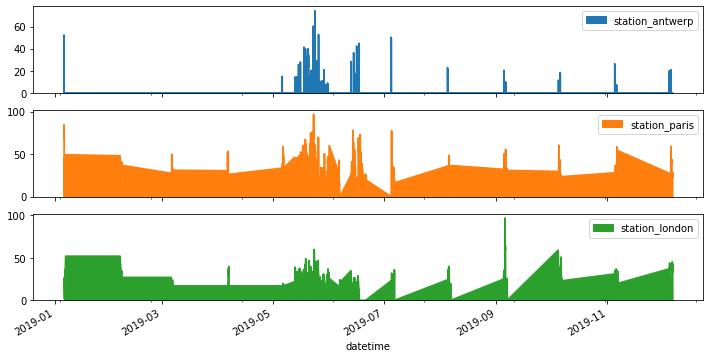

In [49]:
#I want each of the columns in a separate subplot.
axs = air_quality.plot.area(figsize=(12, 6), subplots=True)
plt.show()

Separate subplots for each of the data columns are supported by the subplots argument of the plot functions. The builtin options available in each of the pandas plot functions are worth reviewing.

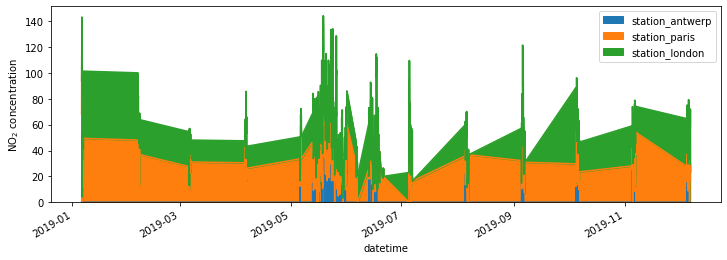

In [50]:
#I want to further customize, extend or save the resulting plot.
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration")
fig.savefig("no2_concentrations.png")
plt.show()

Each of the plot objects created by pandas is a Matplotlib object. As Matplotlib provides plenty of options to customize plots, making the link between pandas and Matplotlib explicit enables all the power of Matplotlib to the plot. This strategy is applied in the previous example:

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))        # Create an empty Matplotlib Figure and Axes
air_quality.plot.area(ax=axs)                   # Use pandas to put the area plot on the prepared Figure/Axes
axs.set_ylabel("NO$_2$ concentration")          # Do any Matplotlib customization you like
fig.savefig("no2_concentrations.png")           # Save the Figure/Axes using the existing Matplotlib method.
plt.show()                                      # Display the plot

<span style="color:LightSeaGreen; font-weight: bold;">REMEMBER  
- The .plot.* methods are applicable on both Series and DataFrames.  
- By default, each of the columns is plotted as a different element (line, boxplot,…).  
- Any plot created by pandas is a Matplotlib object.</span>

### <span style="color:LightSeaGreen">How to create new columns derived from existing columns</span>

<img src="https://pandas.pydata.org/docs/_images/05_newcolumn_1.svg" alt="New column" width="700">

In [52]:
#I want to express the NO2 concentration of the station in London in mg/m3.
#(If we assume temperature of 25 degrees Celsius and pressure of 1013 hPa, the conversion factor is 1.882)
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
#To create a new column, use the [] brackets with the new column name at the left side of the assignment.
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-07-05 02:00:00,NaN,NaN,23.0,43.286
2019-07-05 03:00:00,50.5,25.0,19.0,35.758
2019-07-05 04:00:00,45.0,27.7,19.0,35.758
2019-07-05 05:00:00,NaN,50.4,16.0,30.112
2019-07-05 06:00:00,NaN,61.9,NaN,NaN


The calculation of the values is done element-wise. This means all values in the given column are multiplied by the value 1.882 at once. You do not need to use a loop to iterate each of the rows!

<img src="https://pandas.pydata.org/docs/_images/05_newcolumn_2.svg" alt="New column 2" width="700">

In [54]:
#I want to check the ratio of the values in Paris versus Antwerp and save the result in a new column.
air_quality["ratio_paris_antwerp"] = (air_quality["station_paris"] / air_quality["station_antwerp"])
#The calculation is again element-wise, so the / is applied for the values in each row.
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-07-05 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-07-05 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-07-05 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-07-05 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-07-05 06:00:00,NaN,61.9,NaN,NaN,NaN


Also other mathematical operators (+, -, *, /,…) or logical operators (<, >, ==,…) work element-wise. The latter was already used in the subset data tutorial to filter rows of a table using a conditional expression.

If you need more advanced logic, you can use arbitrary Python code via apply().

In [56]:
#I want to rename the data columns to the corresponding station identifiers used by OpenAQ.
air_quality_renamed = air_quality.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)

In [57]:
air_quality_renamed.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-07-05 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-07-05 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-07-05 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-07-05 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-07-05 06:00:00,NaN,61.9,NaN,NaN,NaN


The rename() function can be used for both row labels and column labels. Provide a dictionary with the keys the current names and the values the new names to update the corresponding names.

The mapping should not be restricted to fixed names only, but can be a mapping function as well. For example, converting the column names to lowercase letters can be done using a function as well:

In [58]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality_renamed.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-07-05 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-07-05 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-07-05 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-07-05 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-07-05 06:00:00,NaN,61.9,NaN,NaN,NaN


<span style="color:LightSeaGreen; font-weight: bold;">REMEMBER  
- Create a new column by assigning the output to the DataFrame with a new column name in between the [].  
- Operations are element-wise, no need to loop over rows.  
- Use rename with a dictionary or function to rename row labels or column names.</span>

### <span style="color:LightSeaGreen">How to calculate summary statistics</span>

#### <span style="color:LightSeaGreen">Aggregating statistics</span>

<img src="https://pandas.pydata.org/docs/_images/06_aggregate.svg" alt="Agreggate stats" width="700">

In [59]:
#What is the average age of the Titanic passengers?
titanic["Age"].mean()

29.69911764705882

Different statistics are available and can be applied to columns with numerical data. Operations in general exclude missing data and operate across rows by default.

<img src="https://pandas.pydata.org/docs/_images/06_reduction.svg" alt="Reduction" width="700">

In [60]:
#What is the median age and ticket fare price of the Titanic passengers?
titanic[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

The statistic applied to multiple columns of a DataFrame (the selection of two columns returns a DataFrame, see the subset data tutorial) is calculated for each numeric column.

The aggregating statistic can be calculated for multiple columns at the same time. Remember the describe function from the first tutorial?

In [61]:
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Instead of the predefined statistics, specific combinations of aggregating statistics for given columns can be defined using the DataFrame.agg() method:

In [62]:
titanic.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    }
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


#### <span style="color:LightSeaGreen">Aggregating statistics grouped by category</span>

<img src="https://pandas.pydata.org/docs/_images/06_groupby.svg" alt="Groupby" width="700">

In [63]:
#What is the average age for male versus female Titanic passengers?
titanic[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


As our interest is the average age for each gender, a subselection on these two columns is made first: titanic[["Sex", "Age"]]. Next, the groupby() method is applied on the Sex column to make a group per category. The average age for each gender is calculated and returned.

Calculating a given statistic (e.g. mean age) for each category in a column (e.g. male/female in the Sex column) is a common pattern. The groupby method is used to support this type of operations. This fits in the more general split-apply-combine pattern:  
- Split the data into groups
- Apply a function to each group independently
- Combine the results into a data structure
- The apply and combine steps are typically done together in pandas.

In the previous example, we explicitly selected the 2 columns first. If not, the mean method is applied to each column containing numerical columns by passing numeric_only=True:

In [64]:
titanic.groupby("Sex").mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


It does not make much sense to get the average value of the Pclass. If we are only interested in the average age for each gender, the selection of columns (rectangular brackets [] as usual) is supported on the grouped data as well:

In [65]:
titanic.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<img src="https://pandas.pydata.org/docs/_images/06_groupby_select_detail.svg" alt="Select detail" width="700">

The Pclass column contains numerical data but actually represents 3 categories (or factors) with respectively the labels ‘1’, ‘2’ and ‘3’. Calculating statistics on these does not make much sense. Therefore, pandas provides a Categorical data type to handle this type of data. More information is provided in the user guide Categorical data section.

In [66]:
#What is the mean ticket fare price for each of the sex and cabin class combinations?
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

Grouping can be done by multiple columns at the same time. Provide the column names as a list to the groupby() method.

#### <span style="color:LightSeaGreen">Count number of records by category</span>

<img src="https://pandas.pydata.org/docs/_images/06_valuecounts.svg" alt="Value counts" width="700">

In [67]:
#What is the number of passengers in each of the cabin classes?
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

The value_counts() method counts the number of records for each category in a column.

The function is a shortcut, as it is actually a groupby operation in combination with counting of the number of records within each group:

In [68]:
titanic.groupby("Pclass")["Pclass"].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

Both size and count can be used in combination with groupby. Whereas size includes NaN values and just provides the number of rows (size of the table), count excludes the missing values. In the value_counts method, use the dropna argument to include or exclude the NaN values.

<span style="color:LightSeaGreen; font-weight: bold;">REMEMBER  
- Aggregation statistics can be calculated on entire columns or rows.  
- groupby provides the power of the split-apply-combine pattern.  
- value_counts is a convenient shortcut to count the number of entries in each category of a variable.</span>

### <span style="color:LightSeaGreen">How to reshape the layout of tables</span>

#### <span style="color:LightSeaGreen">Sort table rows</span>

In [69]:
#I want to sort the Titanic data according to the age of the passengers.
titanic.sort_values(by="Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [70]:
#I want to sort the Titanic data according to the cabin class and age in descending order.
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


With DataFrame.sort_values(), the rows in the table are sorted according to the defined column(s). The index will follow the row order.

#### <span style="color:LightSeaGreen">Long to wide table format</span>

In [75]:
air_quality = pd.read_csv(
    "Pandas/air_quality_long.csv", index_col="date.utc", parse_dates=True
)
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


Let’s use a small subset of the air quality data set. We focus on NO2 data and only use the first two measurements of each location (i.e. the head of each group). The subset of data will be called no2_subset.

In [76]:
# filter for no2 data only
no2 = air_quality[air_quality["parameter"] == "no2"]

In [77]:
# use 2 measurements (head) for each location (groupby)
no2_subset = no2.sort_index().groupby(["location"]).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


<img src="https://pandas.pydata.org/docs/_images/07_pivot.svg" alt="Pivot" width="700">

In [78]:
#I want the values for the three stations as separate columns next to each other.
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


The pivot() function is purely reshaping of the data: a single value for each index/column combination is required.

As pandas supports plotting of multiple columns (see plotting tutorial) out of the box, the conversion from long to wide table format enables the plotting of the different time series at the same time:

In [79]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


<AxesSubplot:xlabel='date.utc'>

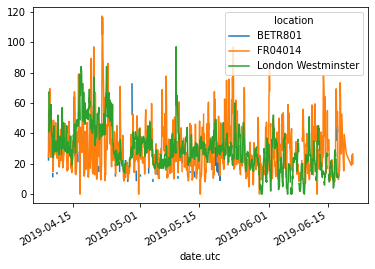

In [80]:
no2.pivot(columns="location", values="value").plot()

When the index parameter is not defined, the existing index (row labels) is used.

#### <span style="color:LightSeaGreen">Pivot table</span>

<img src="https://pandas.pydata.org/docs/_images/07_pivot_table.svg" alt="Pivot table" width="700">

In [81]:
#I want the mean concentrations for NO2 and PM 2.5 in each of the stations in table form.
air_quality.pivot_table(
    values="value", index="location", columns="parameter", aggfunc="mean"
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In the case of pivot(), the data is only rearranged. When multiple values need to be aggregated (in this specific case, the values on different time steps), pivot_table() can be used, providing an aggregation function (e.g. mean) on how to combine these values.

Pivot table is a well known concept in spreadsheet software. When interested in the row/column margins (subtotals) for each variable, set the margins parameter to True:

In [82]:
air_quality.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True,
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In case you are wondering, pivot_table() is indeed directly linked to groupby(). The same result can be derived by grouping on both parameter and location:
```python
air_quality.groupby(["parameter", "location"]).mean()
```

#### <span style="color:LightSeaGreen">Wide to long format</span>

Starting again from the wide format table created in the previous section, we add a new index to the DataFrame with reset_index().

In [83]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


<img src="https://pandas.pydata.org/docs/_images/07_melt.svg" alt="Melt" width="700">

In [84]:
#I want to collect all air quality NO2 measurements in a single column (long format).
no_2 = no2_pivoted.melt(id_vars="date.utc")
no_2.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


The pandas.melt() method on a DataFrame converts the data table from wide format to long format. The column headers become the variable names in a newly created column.

The solution is the short version on how to apply pandas.melt(). The method will melt all columns NOT mentioned in id_vars together into two columns: A column with the column header names and a column with the values itself. The latter column gets by default the name value.

In [85]:
#The parameters passed to pandas.melt() can be defined in more detail:
no_2 = no2_pivoted.melt(
    id_vars="date.utc",
    value_vars=["BETR801", "FR04014", "London Westminster"],
    value_name="NO_2",
    var_name="id_location",
)
no_2.head()

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


The additional parameters have the following effects:  

- value_vars defines which columns to melt together
- value_name provides a custom column name for the values column instead of the default column name value
- var_name provides a custom column name for the column collecting the column header names. Otherwise it takes the index name or a default variable  

Hence, the arguments value_name and var_name are just user-defined names for the two generated columns. The columns to melt are defined by id_vars and value_vars.

<span style="color:LightSeaGreen; font-weight: bold;">REMEMBER  
- Sorting by one or more columns is supported by sort_values.
- The pivot function is purely restructuring of the data, pivot_table supports aggregations.
- The reverse of pivot (long to wide format) is melt (wide to long format).</span>

### <span style="color:LightSeaGreen">How to combine data from multiple tables</span>

In [86]:
air_quality_no2 = pd.read_csv("Pandas/air_quality_no2_long.csv",
                              parse_dates=True)
air_quality_no2 = air_quality_no2[["date.utc", "location",
                                   "parameter", "value"]]
air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [87]:
air_quality_pm25 = pd.read_csv("Pandas/air_quality_pm25_long.csv",
                               parse_dates=True)
air_quality_pm25 = air_quality_pm25[["date.utc", "location",
                                     "parameter", "value"]]
air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


#### <span style="color:LightSeaGreen">Concatenating objects</span>

<img src="https://pandas.pydata.org/docs/_images/08_concat_row.svg" alt="Concat row" width="700">

In [88]:
#I want to combine the measurements of NO2 and PM25, two tables with a similar structure, in a single table.
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)
air_quality.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


The concat() function performs concatenation operations of multiple tables along one of the axes (row-wise or column-wise).

By default concatenation is along axis 0, so the resulting table combines the rows of the input tables. Let’s check the shape of the original and the concatenated tables to verify the operation:

In [89]:
print('Shape of the ``air_quality_pm25`` table: ', air_quality_pm25.shape)
print('Shape of the ``air_quality_no2`` table: ', air_quality_no2.shape)
print('Shape of the resulting ``air_quality`` table: ', air_quality.shape)

Shape of the ``air_quality_pm25`` table:  (1110, 4)
Shape of the ``air_quality_no2`` table:  (2068, 4)
Shape of the resulting ``air_quality`` table:  (3178, 4)


Hence, the resulting table has 3178 = 1110 + 2068 rows.

The axis argument will return in a number of pandas methods that can be applied along an axis. A DataFrame has two corresponding axes: the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1). Most operations like concatenation or summary statistics are by default across rows (axis 0), but can be applied across columns as well.

Sorting the table on the datetime information illustrates also the combination of both tables, with the parameter column defining the origin of the table (either no2 from table air_quality_no2 or pm25 from table air_quality_pm25):

In [90]:
air_quality = air_quality.sort_values("date.utc")
air_quality.head()

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0


In this specific example, the parameter column provided by the data ensures that each of the original tables can be identified. This is not always the case. The concat function provides a convenient solution with the keys argument, adding an additional (hierarchical) row index. For example:

In [93]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])
air_quality_

date.utc            location parameter  value
PM25 0     2019-06-18 06:00:00+00:00             BETR801      pm25   18.0
     1     2019-06-17 08:00:00+00:00             BETR801      pm25    6.5
     2     2019-06-17 07:00:00+00:00             BETR801      pm25   18.5
     3     2019-06-17 06:00:00+00:00             BETR801      pm25   16.0
     4     2019-06-17 05:00:00+00:00             BETR801      pm25    7.5
...                              ...                 ...       ...    ...
NO2  2063  2019-05-07 06:00:00+00:00  London Westminster       no2   26.0
     2064  2019-05-07 04:00:00+00:00  London Westminster       no2   16.0
     2065  2019-05-07 03:00:00+00:00  London Westminster       no2   19.0
     2066  2019-05-07 02:00:00+00:00  London Westminster       no2   19.0
     2067  2019-05-07 01:00:00+00:00  London Westminster       no2   23.0

[3178 rows x 4 columns]

The existence of multiple row/column indices at the same time has not been mentioned within these tutorials. Hierarchical indexing or MultiIndex is an advanced and powerful pandas feature to analyze higher dimensional data.

Multi-indexing is out of scope for this pandas introduction. For the moment, remember that the function reset_index can be used to convert any level of an index to a column, e.g. air_quality.reset_index(level=0)

#### <span style="color:LightSeaGreen">Join tables using a common identifier</span>

In [95]:
#Add the station coordinates, provided by the stations metadata table, to the corresponding rows in the measurements table.
stations_coord = pd.read_csv("Pandas/air_quality_stations.csv")
stations_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


The stations used in this example (FR04014, BETR801 and London Westminster) are just three entries enlisted in the metadata table. We only want to add the coordinates of these three to the measurements table, each on the corresponding rows of the air_quality table.

In [96]:
air_quality.head()

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0


In [97]:
air_quality = pd.merge(air_quality, stations_coord, how="left", on="location")
air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude
0,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,51.49467,-0.13193
1,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83724,2.39390
2,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83722,2.39390
3,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,51.20966,4.43182
4,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,51.20966,4.43182


Using the merge() function, for each of the rows in the air_quality table, the corresponding coordinates are added from the air_quality_stations_coord table. Both tables have the column location in common which is used as a key to combine the information. By choosing the left join, only the locations available in the air_quality (left) table, i.e. FR04014, BETR801 and London Westminster, end up in the resulting table. The merge function supports multiple join options similar to database-style operations.

In [98]:
#Add the parameters’ full description and name, provided by the parameters metadata table, to the measurements table.
air_quality_parameters = pd.read_csv("Pandas/air_quality_parameters.csv")
air_quality_parameters.head()

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10


In [99]:
air_quality = pd.merge(air_quality, air_quality_parameters,
                       how='left', left_on='parameter', right_on='id')
air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude,id,description,name
0,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
1,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83724,2.39390,no2,Nitrogen Dioxide,NO2
2,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83722,2.39390,no2,Nitrogen Dioxide,NO2
3,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,51.20966,4.43182,no2,Nitrogen Dioxide,NO2


Compared to the previous example, there is no common column name. However, the parameter column in the air_quality table and the id column in the air_quality_parameters_name both provide the measured variable in a common format. The left_on and right_on arguments are used here (instead of just on) to make the link between the two tables.

<span style="color:LightSeaGreen; font-weight: bold;">REMEMBER  
- Multiple tables can be concatenated both column-wise and row-wise using the concat function.
- For database-like merging/joining of tables, use the merge function.</span>

### <span style="color:LightSeaGreen">How to handle time series data with ease</span>

In [104]:
air_quality = pd.read_csv("Pandas/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [105]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

#### <span style="color:LightSeaGreen">Using pandas datetime properties</span>

In [106]:
#I want to work with the dates in the column datetime as datetime objects instead of plain text
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

Initially, the values in datetime are character strings and do not provide any datetime operations (e.g. extract the year, day of the week,…). By applying the to_datetime function, pandas interprets the strings and convert these to datetime (i.e. datetime64[ns, UTC]) objects. In pandas we call these datetime objects similar to datetime.datetime from the standard library as pandas.Timestamp.

As many data sets do contain datetime information in one of the columns, pandas input function like pandas.read_csv() and pandas.read_json() can do the transformation to dates when reading the data using the parse_dates parameter with a list of the columns to read as Timestamp:
```Python 
pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["datetime"])
```

Why are these pandas.Timestamp objects useful? Let’s illustrate the added value with some example cases.

In [107]:
#What is the start and end date of the time series data set we are working with?
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

Using pandas.Timestamp for datetimes enables us to calculate with date information and make them comparable. Hence, we can use this to get the length of our time series:

In [108]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

The result is a pandas.Timedelta object, similar to datetime.timedelta from the standard Python library and defining a time duration.

In [109]:
#I want to add a new column to the DataFrame containing only the month of the measurement
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


By using Timestamp objects for dates, a lot of time-related properties are provided by pandas. For example the month, but also year, quarter,… All of these properties are accessible by the dt accessor.

In [110]:
#What is the average NO2 concentration for each day of the week for each of the measurement locations?
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Remember the split-apply-combine pattern provided by groupby from the tutorial on statistics calculation? Here, we want to calculate a given statistic (e.g. mean NO2) for each weekday and for each measurement location. To group on weekdays, we use the datetime property weekday (with Monday=0 and Sunday=6) of pandas Timestamp, which is also accessible by the dt accessor. The grouping on both locations and weekdays can be done to split the calculation of the mean on each of these combinations.

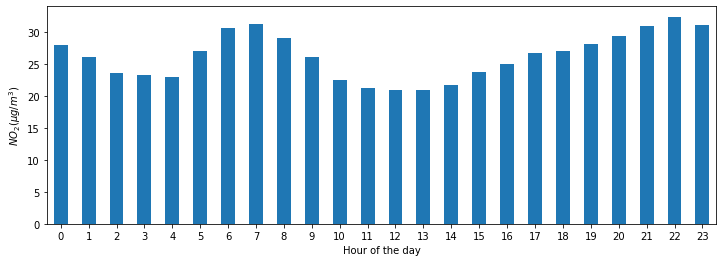

In [111]:
#Plot the typical NO2 pattern during the day of our time series of all stations together. In other words, what is the average value for each hour of the day?
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("Hour of the day");  # custom x label using Matplotlib
plt.ylabel("$NO_2 (µg/m^3)$");

Similar to the previous case, we want to calculate a given statistic (e.g. mean NO2) for each hour of the day and we can use the split-apply-combine approach again. For this case, we use the datetime property hour of pandas Timestamp, which is also accessible by the dt accessor.

#### <span style="color:LightSeaGreen">Datetime as index</span>

In the tutorial on reshaping, pivot() was introduced to reshape the data table with each of the measurements locations as a separate column:

In [112]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


By pivoting the data, the datetime information became the index of the table. In general, setting a column as an index can be achieved by the set_index function.

Working with a datetime index (i.e. DatetimeIndex) provides powerful functionalities. For example, we do not need the dt accessor to get the time series properties, but have these properties available on the index directly:

In [113]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

Some other advantages are the convenient subsetting of time period or the adapted time scale on plots. Let’s apply this on our data.

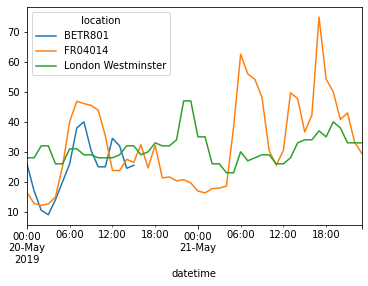

In [114]:
#Create a plot of the NO2 values in the different stations from the 20th of May till the end of 21st of May
no_2["2019-05-20":"2019-05-21"].plot();

By providing a string that parses to a datetime, a specific subset of the data can be selected on a DatetimeIndex.

#### <span style="color:LightSeaGreen">Resample a time series to another frequency</span>

In [115]:
#Aggregate the current hourly time series values to the monthly maximum value in each of the stations.
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


A very powerful method on time series data with a datetime index, is the ability to resample() time series to another frequency (e.g., converting secondly data into 5-minutely data).

The resample() method is similar to a groupby operation:  

- it provides a time-based grouping, by using a string (e.g. M, 5H,…) that defines the target frequency
- it requires an aggregation function such as mean, max,…

When defined, the frequency of the time series is provided by the freq attribute:

In [116]:
monthly_max.index.freq

<MonthEnd>

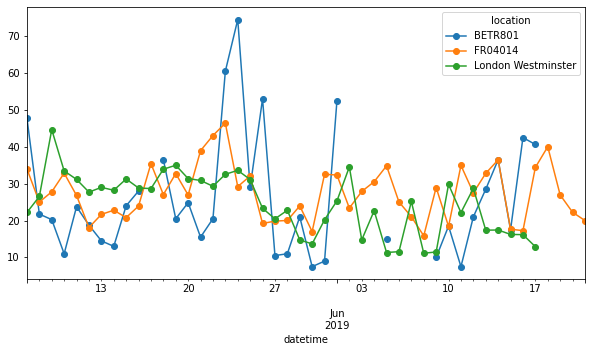

In [117]:
#Make a plot of the daily mean NO2 value in each of the stations.
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));

<span style="color:LightSeaGreen; font-weight: bold;">REMEMBER  
- Valid date strings can be converted to datetime objects using to_datetime function or as part of read functions.  
- Datetime objects in pandas support calculations, logical operations and convenient date-related properties using the dt accessor.  
- A DatetimeIndex contains these date-related properties and supports convenient slicing.  
- Resample is a powerful method to change the frequency of a time series.</span>

### <span style="color:LightSeaGreen">How to manipulate textual data</span>

In [118]:
#Make all name characters lowercase.
titanic["Name"].str.lower()

0                                         anonymous
1                                         anonymous
2                                         anonymous
3      futrelle, mrs. jacques heath (lily may peel)
4                          allen, mr. william henry
                           ...                     
886                           montvila, rev. juozas
887                    graham, miss. margaret edith
888        johnston, miss. catherine helen "carrie"
889                           behr, mr. karl howell
890                             dooley, mr. patrick
Name: Name, Length: 891, dtype: object

To make each of the strings in the Name column lowercase, select the Name column (see the tutorial on selection of data), add the str accessor and apply the lower method. As such, each of the strings is converted element-wise.

Similar to datetime objects in the time series tutorial having a dt accessor, a number of specialized string methods are available when using the str accessor. These methods have in general matching names with the equivalent built-in string methods for single elements, but are applied element-wise (remember element-wise calculations?) on each of the values of the columns.

In [119]:
#Create a new column Surname that contains the surname of the passengers by extracting the part before the comma.
titanic["Name"].str.split(",")

0                                          [anonymous]
1                                          [anonymous]
2                                          [anonymous]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
                            ...                       
886                           [Montvila,  Rev. Juozas]
887                    [Graham,  Miss. Margaret Edith]
888        [Johnston,  Miss. Catherine Helen "Carrie"]
889                           [Behr,  Mr. Karl Howell]
890                             [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

Using the Series.str.split() method, each of the values is returned as a list of 2 elements. The first element is the part before the comma and the second element is the part after the comma.

In [120]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
titanic["Surname"]

0      anonymous
1      anonymous
2      anonymous
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Surname, Length: 891, dtype: object

As we are only interested in the first part representing the surname (element 0), we can again use the str accessor and apply Series.str.get() to extract the relevant part. Indeed, these string functions can be concatenated to combine multiple functions at once!

In [121]:
#Extract the passenger data about the countesses on board of the Titanic.
titanic["Name"].str.contains("Countess")

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [122]:
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


The string method Series.str.contains() checks for each of the values in the column Name if the string contains the word Countess and returns for each of the values True (Countess is part of the name) or False (Countess is not part of the name). This output can be used to subselect the data using conditional (boolean) indexing introduced in the subsetting of data tutorial. As there was only one countess on the Titanic, we get one row as a result.

More powerful extractions on strings are supported, as the Series.str.contains() and Series.str.extract() methods accept regular expressions, but out of scope of this tutorial.

In [123]:
#Which passenger of the Titanic has the longest name?
titanic["Name"].str.len()

0       9
1       9
2       9
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

To get the longest name we first have to get the lengths of each of the names in the Name column. By using pandas string methods, the Series.str.len() function is applied to each of the names individually (element-wise).

In [124]:
titanic["Name"].str.len().idxmax()

307

Next, we need to get the corresponding location, preferably the index label, in the table for which the name length is the largest. The idxmax() method does exactly that. It is not a string method and is applied to integers, so no str is used.

In [125]:
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

Based on the index name of the row (307) and the column (Name), we can do a selection using the loc operator, introduced in the tutorial on subsetting.

In [126]:
#In the “Sex” column, replace values of “male” by “M” and values of “female” by “F”.
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M", "female": "F"})
titanic["Sex_short"]

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: Sex_short, Length: 891, dtype: object

Whereas replace() is not a string method, it provides a convenient way to use mappings or vocabularies to translate certain values. It requires a dictionary to define the mapping {from : to}.

There is also a replace() method available to replace a specific set of characters. However, when having a mapping of multiple values, this would become:

```Python
titanic["Sex_short"] = titanic["Sex"].str.replace("female", "F")
titanic["Sex_short"] = titanic["Sex_short"].str.replace("male", "M")
```

This would become cumbersome and easily lead to mistakes. Just think (or try out yourself) what would happen if those two statements are applied in the opposite order…

<span style="color:LightSeaGreen; font-weight: bold;">REMEMBER  
- String methods are available using the str accessor.  
- String methods work element-wise and can be used for conditional indexing.  
- The replace method is a convenient method to convert values according to a given dictionary.</span>